<a href="https://colab.research.google.com/github/harshitbhandari23/sugar-cane-production-analysis/blob/main/sugarcane_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as snp
import matplotlib.pyplot as plt
df=pd.read_csv("List of countries by Sugarcane Production.csv")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# data Cleaning

In [ ]:
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [ ]:
df=df.dropna().reset_index()
df.head()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.drop(["index","Unnamed: 0"],axis=1,inplace=True)
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     102 non-null    object
 1   Continent                   102 non-null    object
 2   Production (Tons)           102 non-null    object
 3   Production per Person (Kg)  102 non-null    object
 4   Acreage (Hectare)           102 non-null    object
 5   Yield (Kg / Hectare)        102 non-null    object
dtypes: object(6)
memory usage: 4.9+ KB


# converting data type of numeric columns to float

In [ ]:
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].astype("float")
df["Production (Tons)"]=df["Production (Tons)"].astype("float")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].astype("float")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].astype("float")
df

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.000,9.0,43596.5
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Singapore,Asia,50.0,9.000,2.0,25.0
100,Samoa,Oceania,12.0,6.000,1.0,11949.8


In [ ]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

# univariate analysis

# how many countries produce sugarcane from each continent?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\18889798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snp.countplot(data=df,x="Continent",palette="plasma")


<Axes: xlabel='Continent', ylabel='count'>

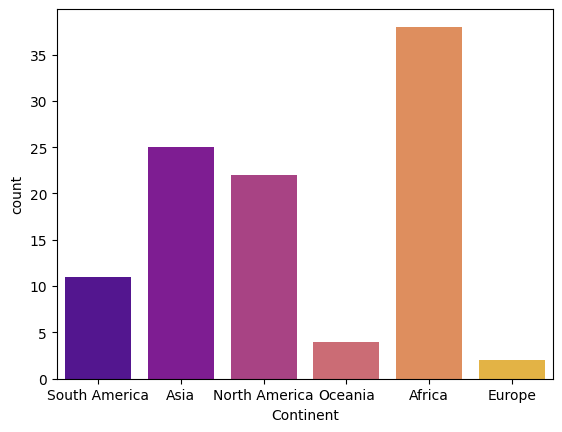

In [ ]:
n=df["Continent"].value_counts()
snp.countplot(data=df,x="Continent",palette="plasma")



<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Count'>

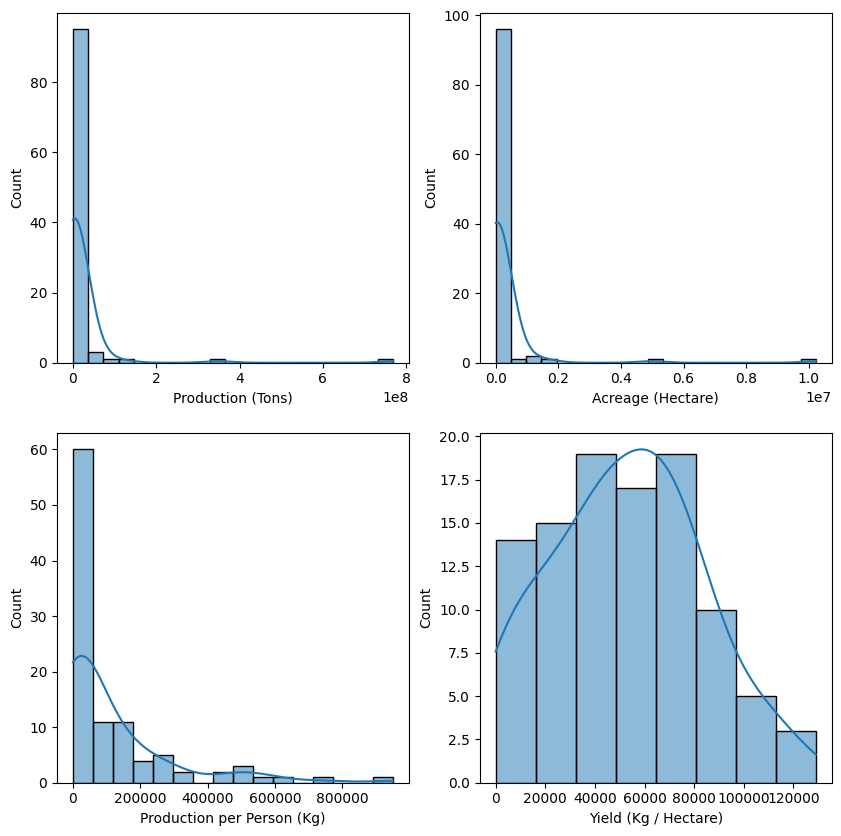

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
snp.histplot(data=df,x="Production (Tons)",kde=True)
plt.subplot(2,2,2)
snp.histplot(df["Acreage (Hectare)"],kde=True)
plt.subplot(2,2,3)
snp.histplot(df["Production per Person (Kg)"],kde=True)
plt.subplot(2,2,4)
snp.histplot(df["Yield (Kg / Hectare)"],kde=True)


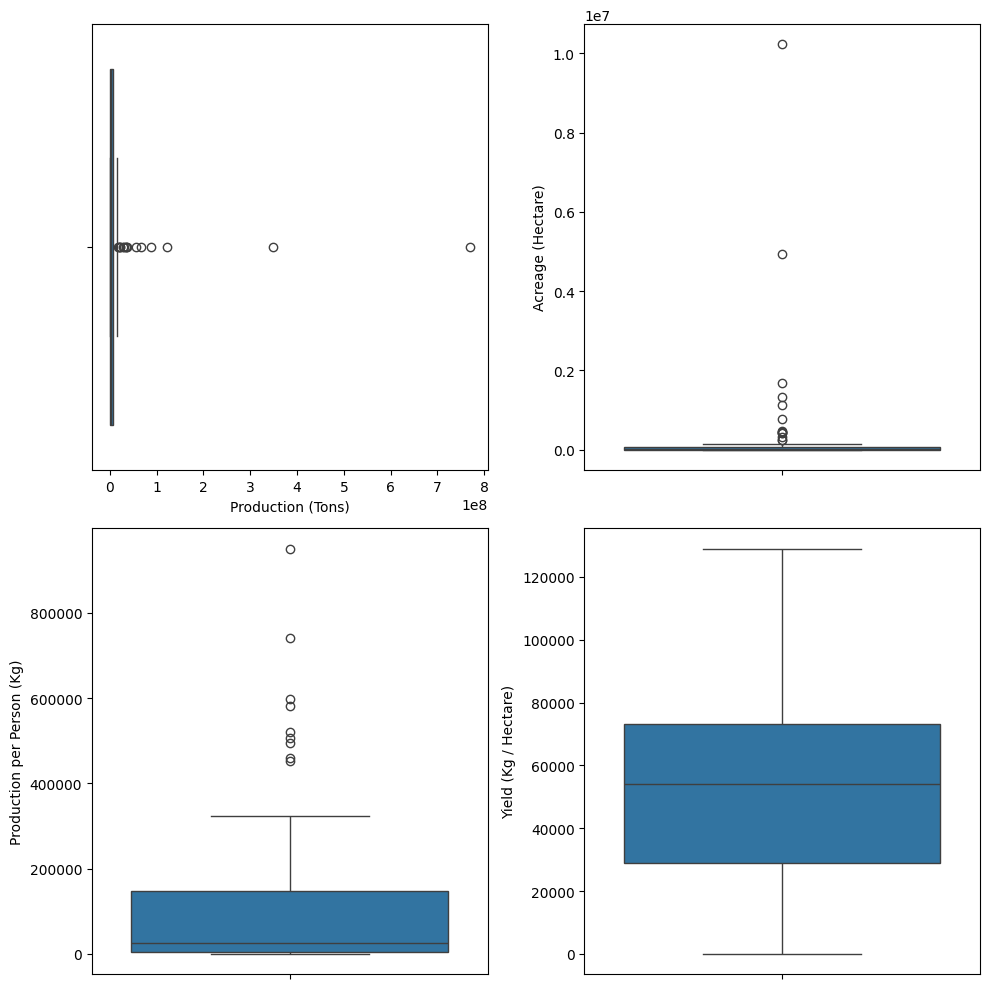

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
snp.boxplot(data=df,x="Production (Tons)")
plt.subplot(2,2,2)
snp.boxplot(df["Acreage (Hectare)"])
plt.subplot(2,2,3)
snp.boxplot(df["Production per Person (Kg)"])
plt.subplot(2,2,4)
snp.boxplot(df["Yield (Kg / Hectare)"])
plt.tight_layout()


In [ ]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# bivariate analysis

# pie chart

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3912\2128739826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["perc"]=df1["Production (Tons)"]/df1["Production (Tons)"].sum()*100


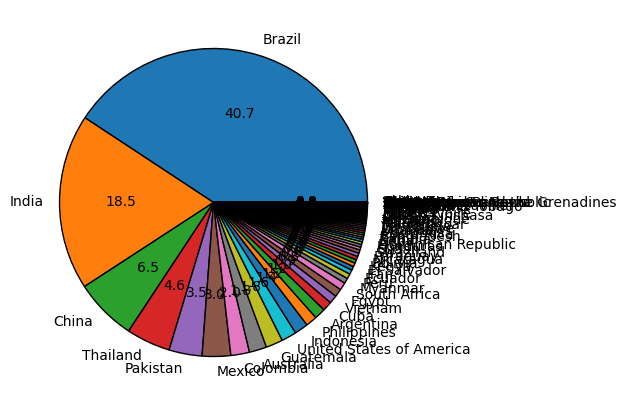

In [ ]:
df1=df[["Country","Production (Tons)"]]
df1["perc"]=df1["Production (Tons)"]/df1["Production (Tons)"].sum()*100
df1
plt.figure(figsize=(10,5))
plt.pie(df1["perc"],labels=df1["Country"],wedgeprops={"edgecolor":"black"},autopct="%0.1f")

plt.show()

<Axes: xlabel='Country', ylabel='Production (Tons)'>

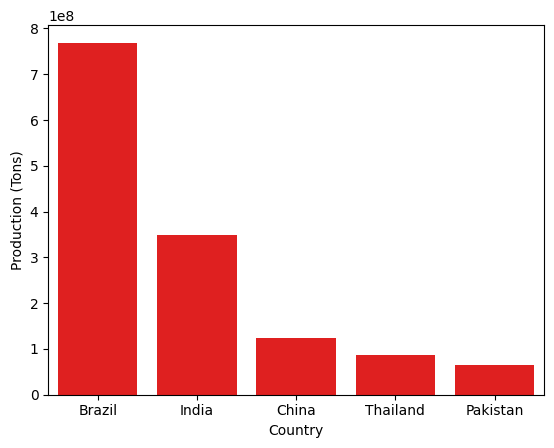

In [ ]:
snp.barplot(data=df.head(),x="Country",y="Production (Tons)",color="red")

# which country has highest land?

In [ ]:
df1=df[["Country","Acreage (Hectare)"]]
arr=df1.values
m=0
for i in arr:
    if(i[1]>m):
        m=i[1]
        c=i[0]

print("the country with most land is",c)


the country with most land is Brazil


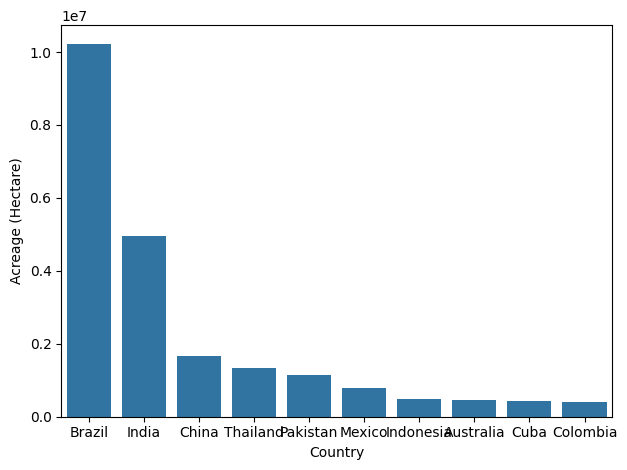

In [ ]:
df1=df1.sort_values(by="Acreage (Hectare)",ascending=False)
df1=df1.head(10)

snp.barplot(data=df1,x="Country",y="Acreage (Hectare)",order=df1["Country"])
plt.tight_layout()

# which country has highest yield per hectare?

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3608\3086744064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snp.barplot(data=df1,x="Country",y="Yield (Kg / Hectare)",palette="plasma")


<Axes: xlabel='Country', ylabel='Yield (Kg / Hectare)'>

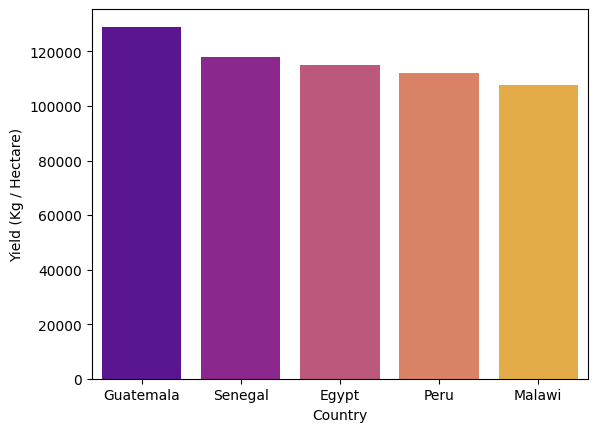

In [ ]:
df1=df[["Country","Yield (Kg / Hectare)"]]
df1=df1.sort_values(by="Yield (Kg / Hectare)",ascending=False)
df1=df1.head(5)
snp.barplot(data=df1,x="Country",y="Yield (Kg / Hectare)",palette="plasma")

# which country has highest production

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7728\3654608647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snp.barplot(data=df1,x="Country",y="Production (Tons)",palette="plasma",estimator=sum)


<Axes: xlabel='Country', ylabel='Production (Tons)'>

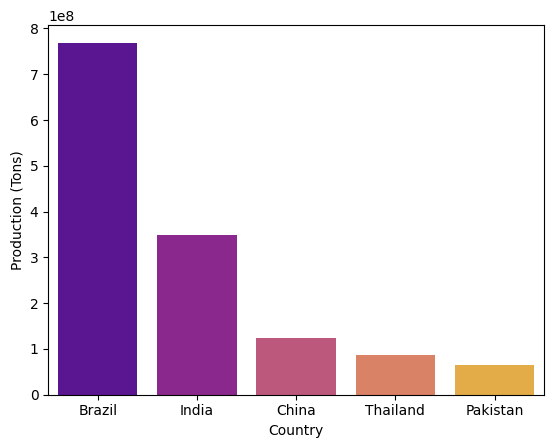

In [ ]:
df1=df[["Country","Production (Tons)"]]
df1=df1.sort_values(by="Production (Tons)",ascending=False)
df1=df1.head()
snp.barplot(data=df1,x="Country",y="Production (Tons)",palette="plasma")

# corelation

In [ ]:
df.corr(numeric_only=True)

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

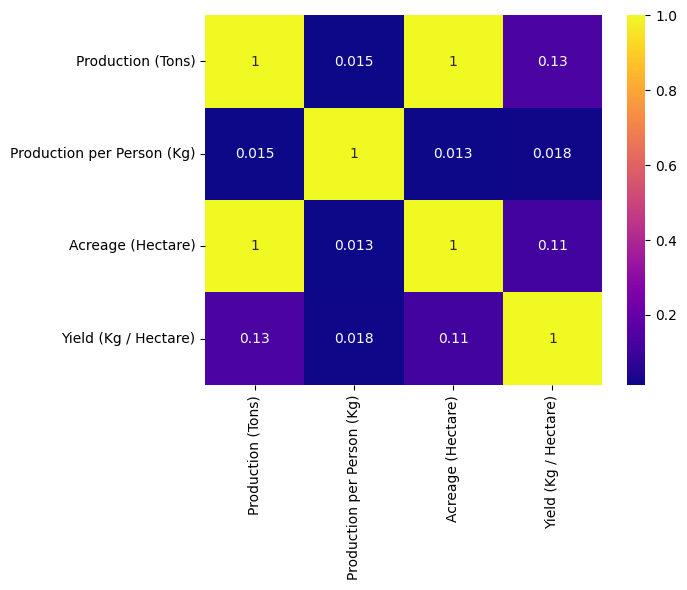

In [ ]:
snp.heatmap(df.corr(numeric_only=True),annot=True,cmap="plasma")

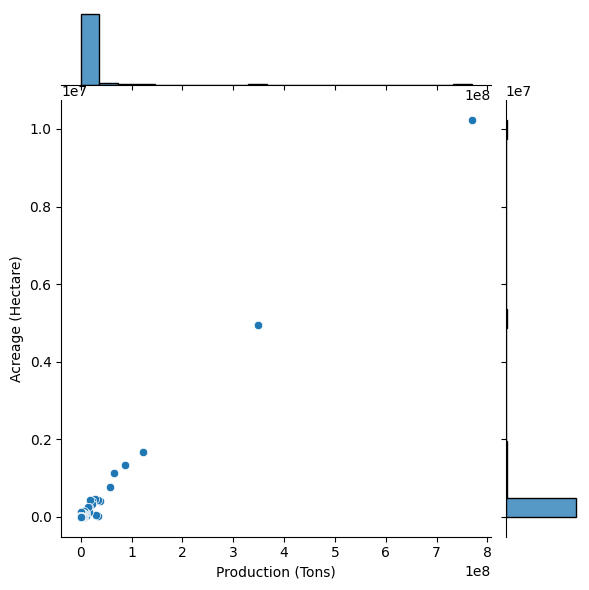

In [ ]:
snp.jointplot(data=df,x="Production (Tons)",y="Acreage (Hectare)")

# do countries with highest land produce more sugarcane?

In [ ]:
# yes

# do countries with more sugarcane yeild per kg hectare produces more sugarcane?

In [ ]:
# no

# analysis for continent

,Country,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),count
Continent,,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2


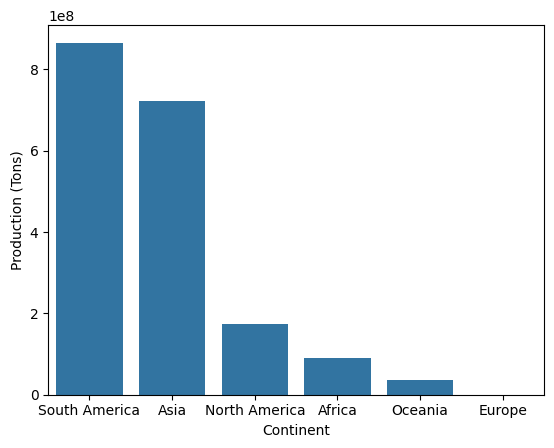

In [ ]:
df1=df.groupby(by="Continent").sum()
df1=df1.sort_values(by="Production (Tons)",ascending=False)
snp.barplot(data=df1,x="Continent",y="Production (Tons)")
df2=df.groupby(by="Continent")["Country"].count()
df1["count"]=df2
df1





# corelation

In [ ]:
df1.corr(numeric_only=True)

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),count
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
count,0.109244,0.540086,0.132817,0.989712,1.000000


# do number of countries in a continent affects the production of sugar cane?

In [ ]:
# NO

# do continent with highest land produce more sugarcane?

# yes